<a href="https://colab.research.google.com/github/hectorpl/EndtoEnd---Predictive-modeling-using-Python/blob/master/LogisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testi

Accuracy: 0.6865671641791045


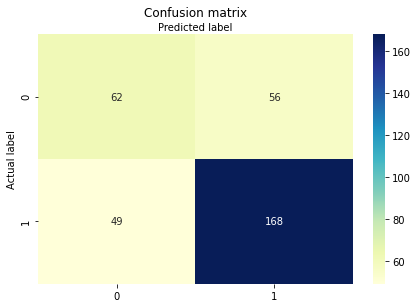

In [1]:
##Import library and read data
import pandas as pd
nbalog=pd.read_csv("https://raw.githubusercontent.com/sgerardak/databasketball/master/nba_logreg.csv")

###See data description
decri=nbalog.describe()

###Using the data described we notice that 3P% has some blank fields. 
###These fields will be filled with 0.
nbalog=nbalog.fillna(0)
###We check the correlation that exists between the data.
pearson=nbalog.corr(method='pearson')
###Some variables are higly correlated so they will be dropped (pearson>.8).
nbalog=nbalog.drop(['MIN', 'PTS','FGM','3P Made','FTM','FTA','TOV','OREB','DREB'], axis=1)

### X are the variables that predict and y the variable we are trying to predict.
X=nbalog[['GP','FGA','FG%','3PA','3P%','FT%','REB','AST','STL','BLK']]
y=nbalog[['TARGET_5Yrs']]

### The data has to be divided in training and test set.
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25)


###We import the model that will be used.
from sklearn.linear_model import LogisticRegression
# Create an instance of the model.
logreg = LogisticRegression()
# Training the model.
logreg.fit(X_train,y_train)
# Do prediction.
y_pred=logreg.predict(X_test)

# Analyzing the results
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

# Libraries used for plots and arrays.
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
